# Visualisation of the last recording signals and Band Power energy

In [1]:
%load_ext autoreload
%autoreload 2

from BandPower import *
import glob 
import os 
list_of_files = glob.glob('../DATA/*') # * means all if need specific format then *.csv 
latest_file = max(list_of_files, key=os.path.getctime)
latest_smell = max(glob.glob(latest_file+'/*'),key=os.path.getctime)
#latest_smell = '../DATA/subject_0/3.csv'

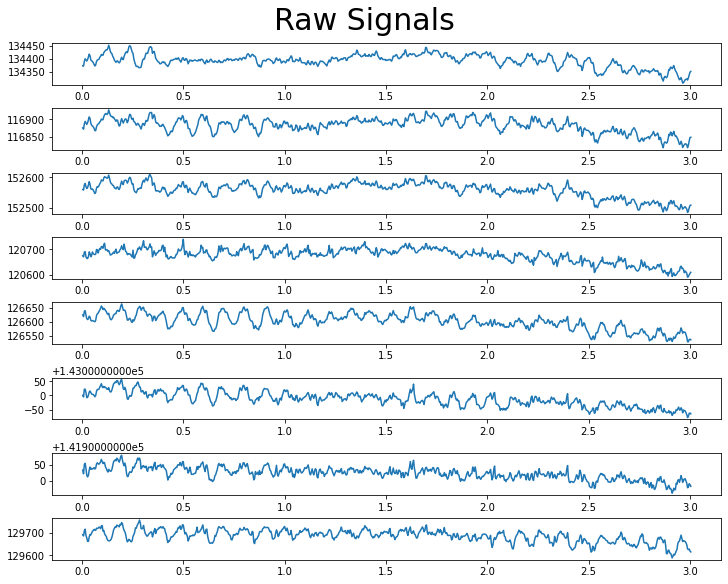

In [5]:
df = pd.read_csv(latest_smell)
plot_raw_signal(df)

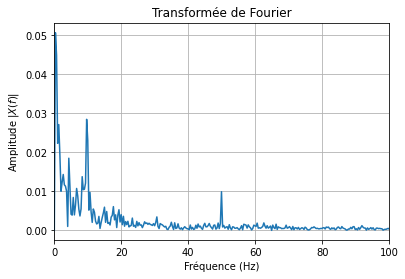

In [6]:
from scipy.fftpack import rfft, irfft, fftfreq,fft

time = df['time']
x = centering_and_normalize(df['Electrode 1'])
W = fftfreq(x.size, d=time[1]-time[0])
f_signal = np.fft.fft(x)


# On prend la valeur absolue de l'amplitude uniquement pour les fréquences positives
X_abs = np.abs(f_signal[:len(f_signal)//2])
# Normalisation de l'amplitude
X_norm = X_abs*2.0/len(X_abs)
# On garde uniquement les fréquences positives
freq_pos = W[:len(W)//2]

plt.plot(freq_pos, X_norm, label="Amplitude absolue")
plt.xlim(0, 100)  # On réduit la plage des fréquences à la zone utile
plt.grid()
plt.xlabel(r"Fréquence (Hz)")
plt.ylabel(r"Amplitude $|X(f)|$")
plt.title("Transformée de Fourier")
plt.show()

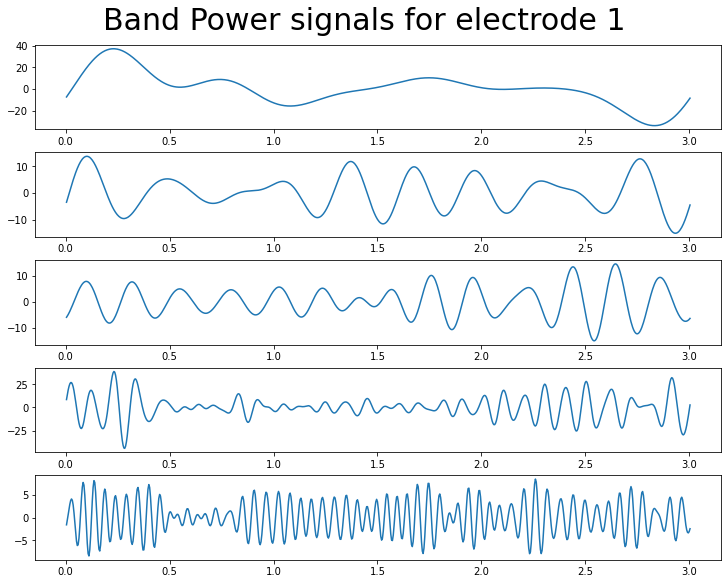

In [7]:
BPS = toBandPower(df)
plot_bandPower_signal(BPS,df,electrode = 1)

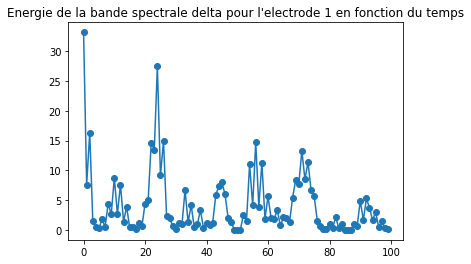

In [13]:
nb_samples = 100

BPVE=BP_varying_energy(BPS,df,nb_samples=nb_samples)
plt.plot(BPVE[0][3],'-o')
plt.title("Energie de la bande spectrale delta pour l'electrode 1 en fonction du temps")
plt.show()

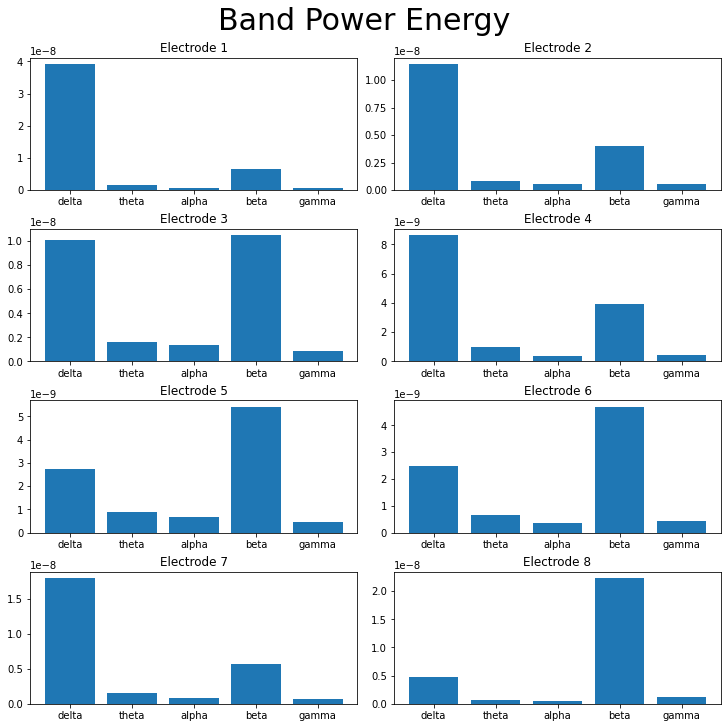

In [14]:

BPEnergy = get_BPEnergy(BPS,df)
plot_bandPower_energy(BPEnergy)

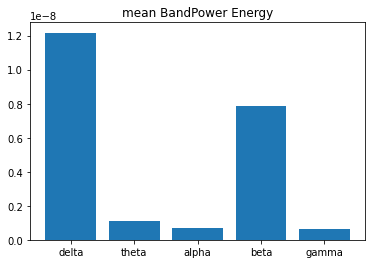

In [15]:
M = meanEnergy(BPEnergy)
plt.bar(range(5),height = M,tick_label=['delta','theta','alpha','beta','gamma'])
plt.title('mean BandPower Energy')
plt.show()